In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.patheffects as path_effects
from IPython.display import HTML
import datetime as dt
import re

import numpy as np
import pandas as pd

from scipy.stats import gaussian_kde

# Slightly modified version of batic from (https://github.com/blab/baltic)
# Primary modification was to make variable date precision default for the decimalDate function
# Also needed to make a couple other changes to get collapseSubtree to work properly
import baltic_variable as bt

## For collapsing clades
from matplotlib.patches import Polygon
import matplotlib.patheffects as path_effects

341 Seqs I
57 Seqs VI
70 Seqs VII
141 Seqs II
127 Seqs V
72 Seqs III


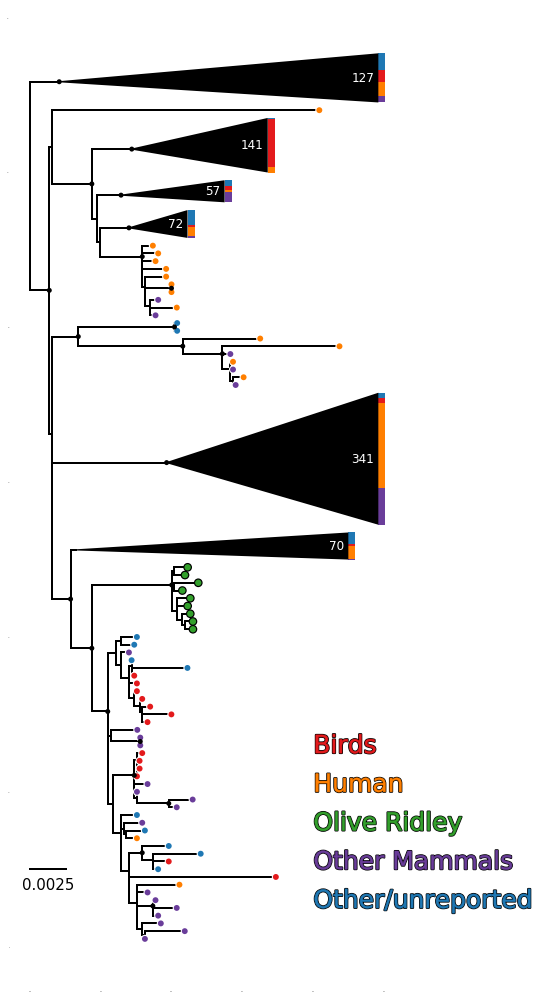

In [2]:
#####################################
####  Serovar-level ML Phylogeny ####
#####################################

#Read metadata
simple_meta = {"bovine":"Other Mammals", 
               "ovine":"Other Mammals", 
               "canine":"Other Mammals", 
               "feline":"Other Mammals",
               "porcine":"Other Mammals", 
               "equine":"Other Mammals",
               "human": "Human",
               "OliveRidley": "Olive Ridley",
               "avian": "Birds",
               "unreported": "Other/unreported",
               "other": "Other/unreported",
               "turtle": "Other/unreported"
              }
md_path='/Users/jtladner/Documents/GitHub/Manuscripts/2018_Work_ORSt/sample_metadata_wgbk_nospace.txt'
fin = open(md_path, 'r')
lc=0
md_dict={}
for line in fin:
    lc+=1
    cols = line.strip().split("\t")
    if lc==1:
        name_idx = cols.index('name1')
        color_idx = cols.index('broad_host')
    if lc>1:
        md_dict[cols[name_idx]] = simple_meta[cols[color_idx]]
del(lc)


colors=["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99", "#b15928"]
col_dict={}
col_count=0
for v in set(md_dict.values()):
    col_dict[v]=colors[col_count]
    col_count+=1

#Clades to collapse
clades_collapse = {"I": ["GCA_002065055.1|human|2001", "GCA_001220385.1|human|1997", "GCA_001220625.1|human|1999", "GCA_001218125.1|human|1996", "GCA_001221585.1|human|1992", "GCA_001222825.1|human|2007", "GCA_001216845.1|bovine|1995", "GCA_001221645.1|human|1995", "GCA_001218725.1|bovine|1998", "GCA_001326255.1|human|1998", "GCA_001350135.1|human|2000", "GCA_001120065.1|human|2001", "GCA_001219285.1|human|1998", "GCA_001215545.1|human|1992", "GCA_001350035.1|human|2001", "GCA_001220225.1|human|2005", "GCA_002063685.1|human|2004"],
          "II": ["GCA_001477895.1|avian|2011", "GCA_002030995.1|avian|2011", "GCA_002033065.1|avian|2010", "GCA_001756125.1|avian|2004-11-03", "GCA_001480205.1|avian|2012", "GCA_001240785.1|avian|2013", "GCA_001243095.1|avian|2013", "GCA_001755875.1|avian|2005-06-01", "GCA_001478625.1|avian|2011", "GCA_001243555.1|avian|2013", "GCA_001477745.1|avian|2011", "GCA_001295675.1|human|2005", "GCA_001295725.1|human|1996", "GCA_001295705.1|human|2002"],
          "III": ["GCA_000784215.1|porcine|2004", "GCA_002063225.1|unreported|", "GCA_001295155.1|human|2015-04", "GCA_001034545.1|human|2014-02-02", "GCA_001614175.1|unreported|2012", "GCA_900166885.1|unreported|", "GCA_001034615.1|human|2014-01-24", "GCA_001989635.1|human|2015-08-15", "GCA_002283545.1|human|2015", "GCA_002091285.1|human|2008", "GCA_001480145.1|porcine|2012", "GCA_900003195.1|unreported|", "GCA_001245735.1|avian|2013", "GCA_001540845.1|unreported|", "GCA_900003975.1|unreported|", "GCA_900003095.1|unreported|", "GCA_900002955.1|unreported|", "GCA_001034565.1|human|2013-10-23", "GCA_001034525.1|human|2014-01-24", "GCA_001026705.1|human|2013-11-29", "GCA_001038105.1|water|2014-04-29"],
          "V": ["26172-1|turtle|2015-02-25", "GCA_002035415.1|unreported|", "GCA_002035035.1|unreported|", "GCA_002030375.1|avian|2011", "GCA_002300255.2|human|2011", "GCA_001480485.1|avian|2012", "GCA_001271965.1|avian|2013", "GCA_002034915.1|unreported|", "GCA_001479815.1|avian|2012", "GCA_002032225.1|avian|2010", "GCA_000170255.1|unreported|", "GCA_000974215.1|avian|2004-12-06", "GCA_001272415.1|avian|2013", "GCA_001477805.1|avian|2011", "GCA_001478325.1|avian|2012", "GCA_002091275.1|human|2012", "GCA_001480025.1|avian|2012", "GCA_000474495.1|human|2009", "GCA_002018355.1|avian|2012-04-18", "GCA_001705365.1|other|2004-06-15", "GCA_000715155.2|unreported|", "GCA_001588025.1|unreported|2010", "GCA_001587885.1|porcine|2012", "GCA_001922185.1|water|2010-01-26", "GCA_001886995.1|avian|2007", "GCA_001295415.1|human|2005", "GCA_001595075.1|human|1985", "GCA_000312785.2|unreported|2008", "GCA_002209225.1|human|2012", "GCA_002252405.2|human|2012", "GCA_001594825.1|human|1992", "GCA_000252875.1|porcine|", "GCA_000188735.1|unreported|", "GCA_001756025.1|avian|2005-03-01", "GCA_000941015.2|unreported|2007-05", "GCA_002065035.1|human|2008", "GCA_000495175.2|avian|", "GCA_001594765.1|avian|1995", "GCA_001576275.1|human|2002", "GCA_001588475.1|human|1998", "GCA_001594795.1|human|1993", "GCA_001594775.1|human|1995", "GCA_002300265.2|human|2011", "GCA_000493535.2|unreported|", "GCA_002723705.1|bovine|1999", "GCA_001955415.1|bovine|2010", "GCA_000505085.1|bovine|2000-05-09", "GCA_001955385.1|bovine|2009", "GCA_001295545.1|human|1993", "26172-1|turtle|2015-02-25"],
          "VI": ["GCA_002798715.1|porcine|2005", "GCA_002798695.1|porcine|2005", "GCA_002809915.1|unreported|2006", "GCA_002798855.1|porcine|2008", "GCA_001594585.1|porcine|2006", "GCA_001981435.1|avian|2010-04", "GCA_001588275.1|avian|2006", "GCA_002252345.2|human|2012", "GCA_002300295.2|human|2010", "GCA_001594665.1|unreported|2002", "GCA_002798725.1|porcine|2005", "GCA_002798775.1|porcine|2005", "GCA_001588395.1|human|2005", "GCA_001594695.1|human|2000", "GCA_002018325.1|porcine|2014-09-15", "GCA_002270095.1|porcine|2013-04-01", "GCA_002260985.1|avian|2015", "GCA_001587785.1|unreported|2013", "GCA_002798595.1|unreported|2011", "GCA_001587775.1|unreported|2013", "GCA_001588365.1|porcine|2006", "GCA_001588255.1|porcine|2006", "GCA_001588335.1|porcine|2006", "GCA_001588075.1|unreported|2009", "GCA_001587945.1|avian|2010", "GCA_001587765.1|unreported|2013", "GCA_001623845.1|bovine|2011-03", "GCA_001623775.1|human|2009-10"],
          "VII": ["GCA_001887015.1|avian|2007", "GCA_002106195.1|water|2012-12-20", "GCA_001272465.1|avian|2013", "GCA_001588105.1|unreported|2009", "GCA_002091015.1|human|2011", "GCA_002009155.1|avian|2009-03-08", "GCA_002252355.2|human|2014", "GCA_001587845.1|unreported|2013", "GCA_002252605.2|human|2012", "GCA_002066815.1|human|1958", "GCA_002063725.1|unreported|1988", "GCA_001595315.1|human|1983", "GCA_001595145.1|human|1984", "GCA_001588565.1|human|1984", "GCA_001595035.1|human|1986", "GCA_002193595.1|unreported|2014", "GCA_000380325.1|unreported|", "GCA_001295555.1|human|1994", "GCA_001295405.1|human|1995", "GCA_001295665.1|human|2005", "GCA_001758525.1|other|1990", "GCA_002029715.1|unreported|2014", "GCA_002025495.1|unreported|2014", "GCA_002289275.1|other|2014", "GCA_002289225.1|other|2014"]
                  }

ours = ["337781|OliveRidley|2016", "337782|OliveRidley|2016", "LOL16001|OliveRidley|2012-12-08", "LOL16002|OliveRidley|2012-02-12", "15332-3|bird|2000-09-28", "21812-1|OliveRidley|2017-06-02", "25231-1|OliveRidley|2017-04-26", "25234-1|OliveRidley|2017-04-26", "25339-1|OliveRidley|2017-06-02", "25433-1|OliveRidley|2017-06-14", "26639-1|turtle|2015-07-23"]

#Raxml-ng tree
tree_path='/Users/jtladner/Documents/GitHub/Manuscripts/2018_Work_ORSt/serovarlevel_raxml.nex'

fin = open(tree_path, 'r')
treeString = fin.read()
fin.close()

if tree_path[-4:] == ".nex": myTree = bt.loadNexus(tree_path, tip_regex='\_([0-9\-]+)$',absoluteTime=False)
else:
    myTree = bt.tree()
    bt.make_tree(treeString, myTree)
myTree.traverse_tree()
myTree.sortBranches()

#Collapse some clades
for clade, members in clades_collapse.iteritems():
    anc=myTree.commonAncestor(members, numName=True)
    for each in myTree.Objects:
            if each.index == anc.index: num_collap = each.numChildren 
    print '%d Seqs %s' % (num_collap, clade)
#    print anc.leaves
    myTree.collapseSubtree(anc, '%d Seqs %s' % (num_collap, clade), widthFunction=lambda x:x/20.0)


fig,ax = plt.subplots(figsize=(7,18),facecolor='w')
branchWidth=2 ## default branch width

#Generating legend for the colors
hosts=col_dict.keys()
for r,host in enumerate(sorted(hosts)[::-1]):
    effects=[path_effects.Stroke(linewidth=2, foreground='k'),
                 path_effects.Stroke(linewidth=0.5, foreground=col_dict[host])] ## colored text, black outline
    
    xpos=0.02
    resc=5
    ax.text(xpos,5+r*resc,'%s'%(host),size=25,color=col_dict[host],ha='left',path_effects=effects)
    
for k in myTree.Objects: ## iterate over objects in tree
    x=k.x ## 
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    xp=k.parent.x ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x

    #Plotting branch
    c='k'
    ec='w'
    #Plotting horizontal branches
    ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=8)
        
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        s=35 ## tip size can be fixed
        ec='white'
        if k.numName in ours:
            #c='skyblue'
            s=40
            ec='black'
        if isinstance(k,bt.leaf):  ## if branch is a leaf object
            c2=col_dict[md_dict[k.numName]]
            ax.scatter(x,y,s=s,facecolor=c2,edgecolor='none',zorder=11) ## plot circle for every tip
            ax.scatter(x,y,s=s+0.9*s,facecolor=ec,edgecolor='none',zorder=10) ## plot another circle underneath
        else: ## it's actually a clade object
            c2 = 'black'
            clade=plt.Polygon(([x,y-0.0005*len(myTree.Objects)],[x,y+0.0005*len(myTree.Objects)],[k.lastHeight,y+k.width/2.0+0.5],[k.lastHeight,y-k.width/2.0+0.5]), facecolor = c2, edgecolor='none',zorder=12)
            ax.add_patch(clade)
            ax.text(k.lastHeight-.0003,y+0.5,k.numName.split()[0], color='w',ha='right',va='center', size=12, zorder=13)

            #Plot black circle if good posterior support
            if k.traits.has_key('bs100'):
                if k.traits['bs100'] >= 99:
                    ax.scatter(x,y,s=25,facecolor='k',edgecolor='none',zorder=13)        


            #For generating "bar graph metadata" for clades
            members=[]
            for each in k.subtree:
                if isinstance(each,bt.leaf): ## if leaf...
                    members.append(col_dict[md_dict[each.numName]])

            top = k.y+k.width/2+0.5
            for c in colors:
                if c in set(members):
                    ccount = members.count(c)
                    prop = float(ccount)/len(members)
                    lineage=plt.Rectangle((k.lastHeight,top-(k.width*prop)),0.0005,k.width*prop,facecolor=c,edgecolor='none') ## rectangle with height and width 1, at y position of tip and at the index of the key
                    ax.add_patch(lineage) ## add coloured rectangle to plot
                    top = top-(k.width*prop)

    
    
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        #Plot vertical portions of branches
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=8)

        #Plot black circle if good bootstrap support
        if k.traits.has_key('bs100'):
            if k.traits['bs100'] >= 99:
                ax.scatter(x,y,s=25,facecolor='k',edgecolor='none',zorder=13)        
                

#Generate scale bar
start = 0.0
length = 0.0025
ypos = 10
ax.plot([start,start+length],[ypos,ypos],lw=branchWidth,color='black',ls='-',zorder=8)
ax.text(start+(length/2),ypos-2,"%.4f" % length,size=15,color='k',ha='center', va='center')


#Some formatting
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x',labelsize=0,size=0)
ax.tick_params(axis='y',labelsize=0,size=0)

#plt.savefig('/Users/jtladner/Documents/GitHub/Manuscripts/2018_Work_ORSt/raxmlng_bs100.png',dpi=200,bbox_inches='tight')
#plt.savefig('/Users/jtladner/Documents/GitHub/Manuscripts/2018_Work_ORSt/raxmlng_bs100.tiff',dpi=200,bbox_inches='tight')
plt.savefig('/Users/jtladner/Documents/GitHub/Manuscripts/2018_Work_ORSt/raxmlng_bs100.pdf',dpi=200,bbox_inches='tight')


{'state': 0, 'OR': 1, 'ORplusSister': 2}
OR 1987.67524508
ORplusSister 1850.34580048
ORplusSister = 1850.06: 1778.21 - 1900.62
OR = 1987.68: 1974.43 - 1996.98


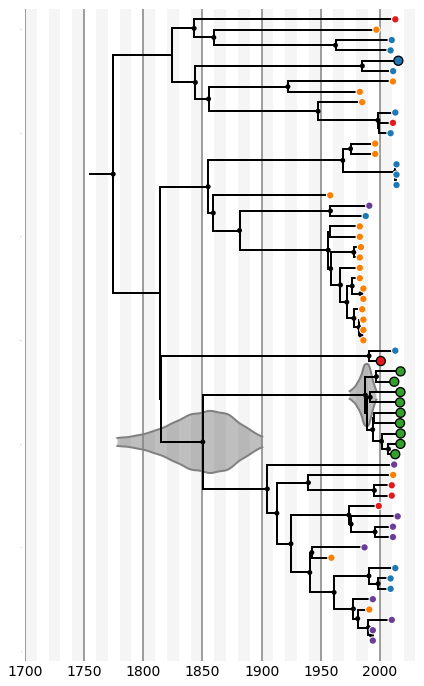

In [5]:
###########################
####  BEAST Phylogeny  ####
###########################

def hpd(data, level):
    """
    Return highest posterior density interval from a list,
    given the percent posterior density interval required.
    """
    d = list(data)
    d.sort()

    nData = len(data)
    nIn = int(round(level * nData))
    if nIn < 2 :
        return None
    #raise RuntimeError("Not enough data. N data: %s"%(len(data)))
 
    i = 0
    r = d[i+nIn-1] - d[i]
    for k in range(len(d) - (nIn - 1)) :
        rk = d[k+nIn-1] - d[k]
        if rk < r :
            r = rk
            i = k

    assert 0 <= i <= i+nIn-1 < len(d)
 
    return (d[i], d[i+nIn-1])

def decimalDate(date,fmt="%Y-%m-%d",variable=False,dateSplitter='-'):
    """ Converts calendar dates in specified format to decimal date. """
    
    if variable==True:
        unknowns=date.count(dateSplitter)

        if unknowns==1:
            #date=dateSplitter.join(date.split(dateSplitter)[:-1])
            fmt=dateSplitter.join(fmt.split(dateSplitter)[:-1])
            precision=1/12.0
        elif unknowns==0:
            #date=dateSplitter.join(date.split(dateSplitter)[:-2])
            fmt=dateSplitter.join(fmt.split(dateSplitter)[:-2])
            precision=1.0
        elif unknowns==2:
            precision=None
    else:
        precision=None
    
    #print '>%s<'%(date)
    
    adatetime=dt.datetime.strptime(date,fmt) ## convert to datetime object
    year = adatetime.year ## get year
    boy = dt.datetime(year, 1, 1) ## get beginning of the year
    eoy = dt.datetime(year + 1, 1, 1) ## get beginning of next year
    return (year + ((adatetime - boy).total_seconds() / ((eoy - boy).total_seconds())),precision) ## return fractional year


#Read metadata
simple_meta = {"bovine":"Other Mammals", 
               "ovine":"Other Mammals", 
               "canine":"Other Mammals", 
               "feline":"Other Mammals",
               "porcine":"Other Mammals", 
               "equine":"Other Mammals",
               "human": "Human",
               "OliveRidley": "Olive Ridley",
               "avian": "Birds",
               "bird": "Birds",
               "unreported": "Other/unreported",
               "other": "Other/unreported",
               "turtle": "Other/unreported"
              }

colors=["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99", "#b15928"]
col_dict={}
col_count=0
for v in set(simple_meta.values()):
    col_dict[v]=colors[col_count]
    col_count+=1

    
#median node heights
tree_path='/Users/jtladner/Documents/GitHub/Manuscripts/2018_Work_ORSt/master_OR0.7_Other0.9_noDup_nonrecomb_varonly_UCLN_sg20_500M.trees_medMCC.tree' 
ll=bt.loadNexus(tree_path, tip_regex='\|([0-9\-]+)$')


clades={'OR':["337781|OliveRidley|2016-12-27", "337782|OliveRidley|2016-12-07", "LOL16001|OliveRidley|2012-12-08", "LOL16002|OliveRidley|2012-02-12", "21812-1|OliveRidley|2017-06-02", "25231-1|OliveRidley|2017-04-26", "25234-1|OliveRidley|2017-04-26", "25339-1|OliveRidley|2017-06-02", "25433-1|OliveRidley|2017-06-14"]}
clades['ORplusSister'] = clades['OR'] + ["SRR3097430|bovine|2012", "CP007523.1|human|2011-02-27"]
tmrcas={c:[] for c in clades.keys()}

log_path='/Users/jtladner/Documents/GitHub/Manuscripts/2018_Work_ORSt/master_OR0.7_Other0.9_noDup_nonrecomb_varonly_UCLN_sg20_500M_tmrcas.log'
#Adjust as appropriate
burnin=0
for line in open(log_path,'r'):
    l=line.strip('\n').split('\t')
    if l[0]=='state':
        header=l
        idx={x:i for i,x in enumerate(header)}
        print idx
    elif int(l[0])>burnin:
        for ca in tmrcas.keys():
            tmrcas[ca].append(float(l[idx['%s'%(ca)]]))


for ca in clades.keys():
    anc=ll.commonAncestor(clades[ca])
    anc.traits['clade']=ca
    print ca,anc.absoluteTime


fig,ax = plt.subplots(figsize=(7,12),facecolor='w')
branchWidth=2 ## default branch width

cmap=mpl.cm.viridis
order=[k.numName for k in ll.traverse_tree()]

ours = ["337781|OliveRidley|2016-12-27", "337782|OliveRidley|2016-12-07", "LOL16001|OliveRidley|2012-12-08", "LOL16002|OliveRidley|2012-02-12", "15332-3|bird|2000-09-28", "21812-1|OliveRidley|2017-06-02", "25231-1|OliveRidley|2017-04-26", "25234-1|OliveRidley|2017-04-26", "25339-1|OliveRidley|2017-06-02", "25433-1|OliveRidley|2017-06-14", "26639-1|turtle|2015-07-23"]
host_color={'OliveRidley':(256/256.0,256/256.0,256/256.0)}

plotTree=ll.Objects

for k in plotTree: ## iterate over objects in tree
    x=k.absoluteTime ## 
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x-20

    #Plotting branches
    c='k'
    ec='w'
    c2 = "grey"
    #Plotting horizontal branches
    ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=8)
        
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        s=40 ## tip size can be fixed
        c2=col_dict[simple_meta[k.name.split('|')[1]]]
        if k.name in ours:
            s=60
            ec='black'

        ax.scatter(x,y,s=s,facecolor=c2,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor=ec,edgecolor='none',zorder=10) ## plot another circle underneath
                
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        #Plot vertical portions of branches
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=8)

        #Plot background black circle
        if k.traits.has_key('posterior'):
            if k.traits['posterior'] >= 0.95:
                ax.scatter(x,y,s=25,facecolor='k',edgecolor='none',zorder=9)        
        
        #Plot kde distribution, for select nodes
        if k.traits.has_key('clade'):
            tmrca_dist=tmrcas[k.traits['clade']]
            switch=np.median(tmrca_dist)
            kde=gaussian_kde(tmrca_dist)
            hpdLo,hpdUp=hpd(tmrca_dist,0.95)
            x_grid=np.linspace(hpdLo,hpdUp,100)

            print "%s = %.2f: %.2f - %.2f" % (k.traits['clade'], switch, hpdLo,hpdUp)
            
            y_grid=kde.evaluate(x_grid)
            y_grid=y_grid/y_grid.max()

            up=[y+w*3 for w in y_grid]
            lo=[y-w*3 for w in y_grid]
            ax.fill_between(x_grid,up,lo,facecolor='grey',edgecolor='none',alpha=0.5,zorder=1)
            ax.plot(x_grid,up,lw=2,color='grey')
            ax.plot(x_grid,lo,lw=2,color='grey')
    

ax.set_ylim(-1,1+len([w for w in plotTree if w.branchType=='leaf']))


xDates=[]
every=10
xDates+=['%04d-01-01'%(y) for y in range(1700,2040,every)]
fmt='%Y'

ax.set_xlim(decimalDate(xDates[0])[0],2030.0)

#Drawing vertical lines
[ax.axvline(x,color='grey') for x in range(1700,2040, 50)]
#Drawing alternating grey/white vertical blocks (really just drawing the grey blocks)
[ax.axvspan(decimalDate(xDates[x])[0],decimalDate(xDates[x])[0]+every,facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xDates),2)]

#Set x-axis tick label positions
ax.set_xticks([decimalDate(x)[0]+1/24.0 for x in xDates if (int(x.split('-')[0]))%50==0])
#Set x-axis tick labels
ax.set_xticklabels([x.split('-')[0] for x in xDates if (int(x.split('-')[0]))%50==0])
#ax.set_xticklabels([convertDate(x,'%Y-%m-%d',fmt) if x.split('-')[1]=='01' else convertDate(x,'%Y-%m-%d','%b') for x in xDates if (int(x.split('-')[1])-1)%every==0])

#Some more formatting
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x',labelsize=14,size=0)
ax.tick_params(axis='y',labelsize=0,size=0)

#plt.savefig('%s/MyPapers/Lassa/BEAST/L/combo1-10/L_tree.png' % gdrive_path,dpi=200,bbox_inches='tight')
#plt.savefig('%s/MyPapers/Lassa/BEAST/L/combo1-10/L_tree.tiff' % gdrive_path,dpi=200,bbox_inches='tight')
plt.savefig('/Users/jtladner/Documents/GitHub/Manuscripts/2018_Work_ORSt/ORSt_BEAST_sg20_UCLN_MCC.pdf',dpi=200,bbox_inches='tight')
